# The Safest Neighborhood in Pittsburgh

### Introduction

By using all the datasets given to us by WPRDC, we ended up narrowing the evidence for the best neighborhoods down to the number of arrests, the number and location of prisoners in Alleghany County, and the number of parks. Our overall metric was to decide what the safest neighborhood in Pittsburgh is. We ultimately chose this metric because there are a lot of different ways to go about gathering evidence through a multitude of datasets, allowing us to have options on what data we wanted to include. The reason we decided to go with a wide variety of datasets is to show the overall general safety of the neighborhoods, not just based one type of data. The number of arrests and prisoners along with their location go to show the areas with the lowest amount of crime, while the number of parks 
helps show the general community and safety of a neighborhood.

## Arrest Dataset

The metric I chose was the amount of arrests per neighborhood. The dataset I used was already between the years 2016-2022, so I decided to use all the data and only display the top neighborhoods with the least amount of arrests.


First we imported the arrest data through pandas and intialized matplotlib which we will use later for the necessary graphs. Next, we imported and read through the arrest dataset. Because the data is a csv, we are able to use pd.read_csv to read the dataset. Let's then use arrestData.head() to display the first five rows of data. This is useful as we can see the type of data being analyzed and since this dataset has thousands of entries, it's better than displaying the entirety of the datset. 

In [2]:
#imports panda and matplotlib
import pandas as pd
%matplotlib inline

#import and read the arrests dataset
arrestData = pd.read_csv('https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f')

#display first five rows of data
arrestData.head(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


For the next step we begin again by importing pandas and matplotlib. We then initialize a dictionary so we can sort through the data easily. Using pd.read_csv we are able to read through the dataset once again. Using two separate for loops, we are able to read through both the columns within the dataset, and the values within a specified column. The first for loop goes through the columns in arrestData and within the loop, the column we want which is 'neighborhoods' is selected out of all the columns. The second for loop then goes through every value in 'neighborhoods' and if the value doesn't already exist within the dictionary the value becomes 1, otherwise 1 is added to the already existing value. This allows us to count how many arrests occured within which neighborhoods and figure out which neighborhoods are the safest based on the output.

In [3]:
#imports panda and matplotlib
import pandas as pd
%matplotlib inline

#intialize dictionary and read through dataset
arrestDictionary = dict()
arrestData = pd.read_csv('https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f')

#loops through specified column in dataset
for column in arrestData:
    #initializes the specified column and iterates through its values
    neighborhoods = arrestData["INCIDENTNEIGHBORHOOD"].values

#loops through every value in the neighborhoods column
for value in neighborhoods:
    
    #states if value isn't already in the dictionary, the value becomes 1
    if value not in arrestDictionary:
        arrestDictionary[value] = 1
    else:
        #states if value is already in dictionary, 1 is added to the value
        arrestDictionary[value] = arrestDictionary[value] + 1

#prints out dictionary
print(arrestDictionary)

{'Bloomfield': 880, 'Outside City': 274, 'Westwood': 203, 'East Allegheny': 1893, 'Crafton Heights': 513, 'Greenfield': 473, 'Brookline': 1196, 'Regent Square': 32, 'East Liberty': 1652, nan: 2203, 'East Hills': 1026, 'Carrick': 2102, 'Allegheny Center': 1122, 'South Side Flats': 3053, 'Sheraden': 1132, 'East Carnegie': 47, 'Golden Triangle/Civic Arena': 83, 'Point Breeze North': 249, 'Perry South': 954, 'Allentown': 855, 'North Shore': 722, 'Marshall-Shadeland': 1332, 'Central Oakland': 469, 'Middle Hill': 844, 'Strip District': 440, 'Lincoln-Lemington-Belmar': 1148, 'Central Northside': 23, 'Troy Hill-Herrs Island': 6, 'Highland Park': 502, 'Homewood North': 1742, 'Northview Heights': 626, 'Brighton Heights': 978, 'Hazelwood': 1225, 'Perry North': 554, 'Bedford Dwellings': 582, 'Elliott': 588, 'Beechview': 1076, 'Fineview': 750, 'Glen Hazel': 143, 'Spring Hill-City View': 630, 'Bluff': 1313, 'Manchester': 439, 'Homewood West': 699, 'Outside County': 49, 'Point Breeze': 283, 'Homewood

Since the dictionary simply printed out is quite difficult to understand, we converted the dictionary into a series so we could then sort all the values in ascending order therefore making it a lot easier to comprehend.

In [4]:
#changes the dictionary to a series
arrestDataSeries = pd.Series(arrestDictionary, name = 'Arrests Per Neighborhood')

#sorts through the values within the series and places then in ascending order
arrestDataSeries.sort_values()[:]

Mt. Oliver Neighborhood         2
Troy Hill-Herrs Island          6
Mt. Oliver Boro                18
Central Northside              23
Ridgemont                      32
                             ... 
East Allegheny               1893
Carrick                      2102
NaN                          2203
South Side Flats             3053
Central Business District    3570
Name: Arrests Per Neighborhood, Length: 99, dtype: int64

We then decided to sort the series again but this time we used the first 20 neighborhoods with the least amount of arrests. This makes it easier for us to graph and visualize the data later rather than trying to vizualize every single neighborhood.

In [5]:
#displays the first 20 neighborhoods within the sorted series
arrestDataSeries.sort_values()[:20]

Mt. Oliver Neighborhood          2
Troy Hill-Herrs Island           6
Mt. Oliver Boro                 18
Central Northside               23
Ridgemont                       32
Regent Square                   32
Chartiers City                  38
Swisshelm Park                  38
New Homestead                   38
St. Clair                       45
East Carnegie                   47
Outside County                  49
Outside State                   57
Summer Hill                     63
Oakwood                         78
Golden Triangle/Civic Arena     83
Hays                            98
Windgap                        103
Fairywood                      108
Mount Oliver                   111
Name: Arrests Per Neighborhood, dtype: int64

Now that we have our first 20 neighborhoods set up and ordered, let's make a graph of the data so we can see the comparaison visually.

Text(0, 0.5, 'Number of Arrests')

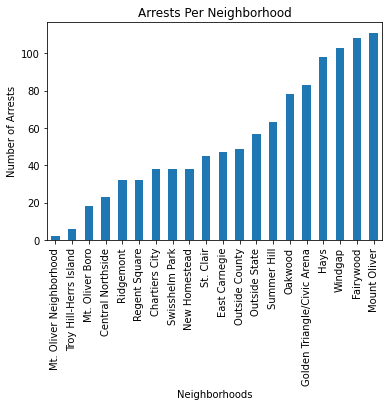

In [7]:
#import matplotlib to graph the data
import matplotlib.pyplot as plt

#plots the arrest series of the first 20 neighborhoods in a bar graph
arrestDataSeries.sort_values()[:20].plot.bar()

#applies labels to the title and axes
plt.title('Arrests Per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Arrests')

Looking at the graph above, we can see the general upward trend of the amount of arrests. We can see the first 10 neighborhoods are all quite low but there is a small spike of arrests toward the right side of the graph. It will be quite intriguing to compare this data with the other two datasets and see which neighborhoods are truly the safest.

## Crime Dataset

## Park Dataset

## Combined Data

## Conclusions

#### Winner:

Morgan:
    

    
    
    
Luke:
    
    
    
    
     
Meagan: